## Support vector machine (multi flow pattern)

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import warnings
warnings.filterwarnings('ignore')

from pandas import set_option
set_option("display.max_rows", 10)
pd.options.mode.chained_assignment = None

readdata = pandas.read_csv('BDOShoham.csv')
training_data= pandas.DataFrame(readdata, columns=['FlowPattern', 'Vsl', 'Vsg', 'VisL', 'VisG', 'DenL', 'DenG', 'ST', 'Ang', 'ID'])
training_data

,FlowPattern,Vsl,Vsg,VisL,VisG,DenL,DenG,ST,Ang,ID
0,1,6.30000,0.0250,0.001,0.00002,1000,1.8,0.07,0.0,0.051
1,1,4.00000,0.0400,0.001,0.00002,1000,1.8,0.07,0.0,0.051
2,1,6.30000,0.0400,0.001,0.00002,1000,1.8,0.07,0.0,0.051
3,1,4.00000,0.0630,0.001,0.00002,1000,1.8,0.07,0.0,0.051
4,1,6.30000,0.0630,0.001,0.00002,1000,1.8,0.07,0.0,0.051
...,...,...,...,...,...,...,...,...,...,...
5670,5,2.70096,15.8561,0.001,0.00002,1000,1.8,0.07,-80.0,0.025
5671,5,1.58784,15.8394,0.001,0.00002,1000,1.8,0.07,-80.0,0.025
5672,5,1.05338,16.0692,0.001,0.00002,1000,1.8,0.07,-80.0,0.025
5673,5,1.05397,25.7439,0.001,0.00002,1000,1.8,0.07,-80.0,0.025


In [3]:
# Flow Patterns
# 1=DB  2=SS   3=SW
# 4=A 5=I 6=B
flowpatterns_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00','#1B4F72','#2E86C1']

flowpatterns_labels = ['DB', 'SS', 'SW', 'A', 'I', 'B']

correct_FlowPattern_labels = training_data['FlowPattern'].values
#correct_FlowPattern_labels 
feature_vectors = training_data.drop(['FlowPattern'], axis=1)
feature_vectors.describe()

,Vsl,Vsg,VisL,VisG,DenL,DenG,ST,Ang,ID
count,5675.000000,5675.000000,5.675000e+03,5.675000e+03,5675.0,5.675000e+03,5.675000e+03,5675.000000,5675.000000
mean,0.899747,6.222612,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,2.727401,0.038657
std,1.425159,8.699644,4.055273e-17,2.361736e-18,0.0,4.108187e-14,5.690394e-15,46.202822,0.012985
min,0.001100,0.003720,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,-90.000000,0.025000
25%,0.016000,0.162055,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,-10.000000,0.025000
50%,0.250000,1.600000,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,0.500000,0.051000
75%,1.500000,10.000000,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,20.000000,0.051000
max,25.517000,42.956200,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,90.000000,0.051000


In [5]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(feature_vectors)
scaled_features = scaler.transform(feature_vectors)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_features, correct_FlowPattern_labels, test_size=0.2, random_state=42)

In [6]:
from sklearn import svm

clf = svm.SVC()
y_train
clf.fit(X_train,y_train)
predicted_labels = clf.predict(X_test)

In [7]:
from sklearn.metrics import confusion_matrix

def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels]+[5]) # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print ("    " + empty_cell),
    for label in labels:
        print ("%{0}s".format(columnwidth) % label),
    print
    # Print rows
    for i, label1 in enumerate(labels):
        print ("    %{0}s".format(columnwidth) % label1),
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print (cell),
        print

conf = confusion_matrix(y_test, predicted_labels)
# then print it in a pretty way

def accuracy(conf):
    total_correct = 0.
    nb_classes = conf.shape[0]
    for i in np.arange(0,nb_classes):
        total_correct += conf[i][i]
    acc = total_correct/sum(sum(conf))
    return acc

print('Flow Pattern classification accuracy = %f' % accuracy(conf))

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
print ('Accuracy:', accuracy_score(y_test, predicted_labels))
print ('F1 score:', f1_score(y_test, predicted_labels,average='weighted'))
print ('Recall:', recall_score(y_test, predicted_labels,average='weighted'))
print ('Precision:', precision_score(y_test, predicted_labels, average='weighted'))
print ('\n clasification report:\n', classification_report(y_test, predicted_labels))
print ('\n confusion matrix:\n',confusion_matrix(y_test, predicted_labels))

Flow Pattern classification accuracy = 0.742731
Accuracy: 0.7427312775330397
F1 score: 0.7110686707438714
Recall: 0.7427312775330397
Precision: 0.7012443947027571

 clasification report:
               precision    recall  f1-score   support

           1       0.84      0.71      0.77       102
           2       0.00      0.00      0.00        27
           3       0.60      0.34      0.43       192
           4       0.75      0.90      0.82       200
           5       0.75      0.89      0.81       593
           7       0.00      0.00      0.00        21

   micro avg       0.74      0.74      0.74      1135
   macro avg       0.49      0.47      0.47      1135
weighted avg       0.70      0.74      0.71      1135


 confusion matrix:
 [[ 72   0   0   0  30   0]
 [  0   0   0   0  27   0]
 [  0   0  65  42  85   0]
 [  0   0   8 180  12   0]
 [ 14   0  35  18 526   0]
 [  0   0   0   0  21   0]]


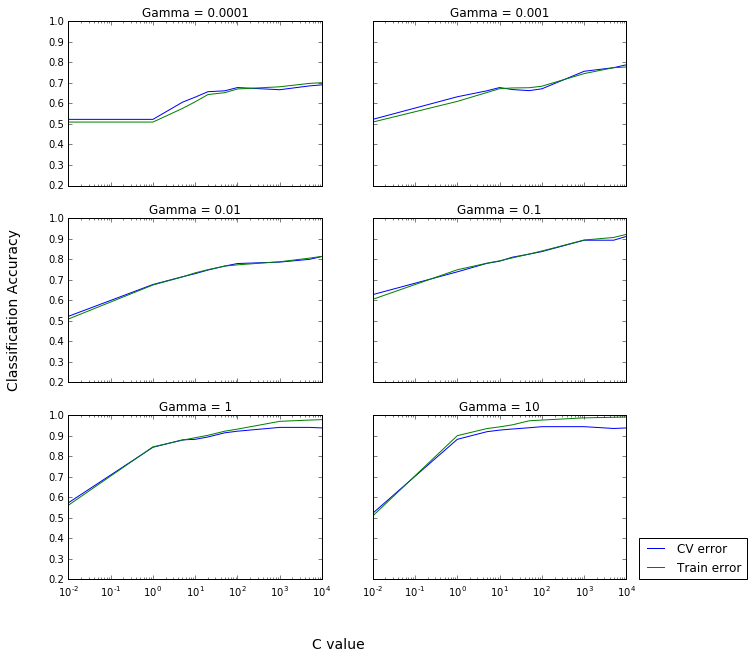

In [22]:
#model selection takes a few minutes, change this variable
#to true to run the parameter loop
do_model_selection = True

if do_model_selection:
    C_range = np.array([.01, 1, 5, 10, 20, 50, 100, 1000, 5000, 10000])
    gamma_range = np.array([0.0001, 0.001, 0.01, 0.1, 1, 10])
    
    fig, axes = plt.subplots(3, 2, sharex='col', sharey='row',figsize=(10,10))
    plot_number = 0
    for outer_ind, gamma_value in enumerate(gamma_range):
        row = int(plot_number / 2)
        column = int(plot_number % 2)
        cv_errors = np.zeros(C_range.shape)
        train_errors = np.zeros(C_range.shape)
        for index, c_value in enumerate(C_range):
                                                     
            clf = svm.SVC(C=c_value, gamma=gamma_value)
            clf.fit(X_train,y_train)
                                                             
            train_conf = confusion_matrix(y_train, clf.predict(X_train))
            cv_conf = confusion_matrix(y_test, clf.predict(X_test))
                                                                     
            cv_errors[index] = accuracy(cv_conf)
            train_errors[index] = accuracy(train_conf)
                                                                             
        ax = axes[row, column]
        ax.set_title('Gamma = %g'%gamma_value)
        ax.semilogx(C_range, cv_errors, label='CV error')
        ax.semilogx(C_range, train_errors, label='Train error')
        plot_number += 1
        ax.set_ylim([0.2,1])
                                                                                             
    ax.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)
    fig.text(0.5, 0.03, 'C value', ha='center',
             fontsize=14)
    
    fig.text(0.04, 0.5, 'Classification Accuracy', va='center',
             rotation='vertical', fontsize=14)

    plt.show()

In [24]:
clf = svm.SVC(C=100, gamma=10)
clf.fit(X_train, y_train)

cv_conf = confusion_matrix(y_test, clf.predict(X_test))

print('Optimized Flow Pattern classification accuracy = %.2f' % accuracy(cv_conf))

predicted_labels_rbf = clf.predict(X_test)

conf_rbf = confusion_matrix(y_test, predicted_labels_rbf)

# then print it in a pretty way

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
print ('Accuracy:', accuracy_score(y_test, predicted_labels_rbf))
print ('F1 score:', f1_score(y_test, predicted_labels_rbf,average='weighted'))
print ('Recall:', recall_score(y_test, predicted_labels_rbf,
                              average='weighted'))
print ('Precision:', precision_score(y_test, predicted_labels_rbf,
                                    average='weighted'))
print ('\n clasification report:\n', classification_report(y_test, predicted_labels_rbf))
print ('\n confusion matrix:\n',confusion_matrix(y_test, predicted_labels_rbf))

Optimized Flow Pattern classification accuracy = 0.94
Accuracy: 0.94449339207
F1 score: 0.944460829346
Recall: 0.94449339207
Precision: 0.944641865952

 clasification report:
              precision    recall  f1-score   support

          1       0.89      0.90      0.90       102
          2       0.86      0.93      0.89        27
          3       0.94      0.90      0.92       192
          4       0.92      0.93      0.93       200
          5       0.96      0.97      0.97       593
          7       1.00      1.00      1.00        21

avg / total       0.94      0.94      0.94      1135


 confusion matrix:
 [[ 92   0   0   0  10   0]
 [  0  25   2   0   0   0]
 [  1   4 173  10   4   0]
 [  0   0   7 186   7   0]
 [ 10   0   2   6 575   0]
 [  0   0   0   0   0  21]]
